
# <p style="text-align: center;"> <b> Exploring and Pre-processing Data </b></p>
---

## Table of Contents



---

# Import Libraries <a class="anchor" id="import"></a>

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('dataset.csv',index_col=0)
df.sample(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
63271,0ddbXUxKVScdcSCcPeVVqm,Macaroni Empitsu,ハッピーエンドへの期待は,メレンゲ,38,237193,False,0.601,0.680,2,-4.638,1,0.0317,0.0154,0.000000,0.101,0.656,104.023,4,j-rock
69788,3zyde4vhyMBa4YM7JR3cvL,Aromal Chekaver;Ann Pearson,Hope,Mazha,4,193933,False,0.511,0.453,4,-9.101,0,0.0924,0.6230,0.000011,0.296,0.514,143.409,4,malay
80267,2dOWkdPfiT9SU2Wm734Rh6,Arijit Singh,Love Dose Arijit Singh,"Kabhi Jo Baadal Barse (From ""Jackpot)",64,254300,False,0.451,0.449,0,-6.702,0,0.0293,0.2610,0.000000,0.143,0.217,149.768,4,pop-film
17218,0XGoZeBkI6n9TKnp7pjMMu,FOVOS,Breathe,Breathe,43,186666,False,0.669,0.927,1,-6.919,1,0.0464,0.0390,0.901000,0.331,0.547,126.012,4,club
37412,5elz7Ovan3KbnsP7lEtoXe,MC Hariel;Mc Pedrinho,Mundão Girou (Regravações) [Ao Vivo],4M no Toque - Ao Vivo,48,161403,False,0.664,0.684,5,-5.933,1,0.3520,0.1330,0.000000,0.945,0.380,80.974,5,funk


### How many rows and columns?

In [94]:
df.shape

(114000, 20)

The dataset has 11400 rows and 20 columns.

### What is the meaning of each row?

Each row in the Spotify track dataset represents the information of a single song from Spotify. The dataset includes identification information such as `track_id`, `track_name`, `artists`... and various audio features like `danceability`, `energy`, `loudness`, `speechiness`...

### Are there duplicated rows?

In [95]:
df.duplicated().sum()

450

There are 450 duplicated rows in the dataset. We will remove them.

### Drop duplicated rows

In [96]:
df.drop_duplicates(inplace=True)

print(f'Duplicate row: {df.duplicated().sum()}')
print(f'Data shape: {df.shape}')

Duplicate row: 0
Data shape: (113550, 20)


After dropping duplicated rows, we have 113550 rows left.

### What is the meaning of each colum?

- `track_id`: The Spotify ID for the track

- `artists`: The artists' names who performed the track. If there is more than one artist, they are separated by a ;

- `album_name`: The album name in which the track appears

- `track_name`: Name of the track

- `popularity`: **The popularity of a track is a value between 0 and 100, with 100 being the most popular**. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.

- `duration_ms`: The track length in milliseconds

- `explicit`: Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)

- `danceability`: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable

- `energy`: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale

- `key`: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1

- `loudness`: The overall loudness of a track in decibels (dB)

- `mode`: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0

- `speechiness`: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks

- `acousticness`: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic

- `instrumentalness`: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content

- `liveness`: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live

- `valence`: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)

- `tempo`: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration

- `time_signature`: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.

- `track_genre`: The genre in which the track belongs

### What is the current data type of each column? Are there any columns having inappropriate data types?

In [97]:
df.dtypes

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

There are some inapropriate columns' data types:

- `track_id, artists, album_name, track_name, track_genre` are String

Convert to correct data types

In [98]:
obj_to_str_cols = ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']

df[obj_to_str_cols] = df[obj_to_str_cols].astype(str)

In [99]:
df.dtypes

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

## 02. Data Distribution

### 02.1.1 Distribution of a numerical column

First we have to take out all numerical columns

In [9]:
numerical_cols = df[df.columns[(df.dtypes == 'float64') | (df.dtypes == 'int64')]]
numerical_cols.shape

(113550, 14)

There are 14 numerical columns, let's see 5 sample rows of them

In [10]:
numerical_cols.sample(5)

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
40160,46,437386,0.352,0.478,7,-6.800,1,0.0330,0.500000,0.0000,0.1200,0.0761,123.219,4
54697,10,394400,0.692,0.724,3,-13.130,1,0.0552,0.130000,0.6330,0.1080,0.4400,140.992,3
80917,55,309662,0.462,0.456,11,-11.408,1,0.0302,0.773000,0.0000,0.0870,0.4030,82.499,3
42923,11,107026,0.282,0.917,6,-6.262,0,0.1100,0.000219,0.0012,0.2070,0.3120,143.484,4
15401,55,257647,0.756,0.426,1,-8.750,0,0.0745,0.504000,0.0394,0.0884,0.3550,135.960,4


#### What is the percentage of missing values?

To start our analysis, we first examined the numerical columns using the `numerical_cols.info()` method.

In [11]:
numerical_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113550 entries, 0 to 113999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        113550 non-null  int64  
 1   duration_ms       113550 non-null  int64  
 2   danceability      113550 non-null  float64
 3   energy            113550 non-null  float64
 4   key               113550 non-null  int64  
 5   loudness          113550 non-null  float64
 6   mode              113550 non-null  int64  
 7   speechiness       113550 non-null  float64
 8   acousticness      113550 non-null  float64
 9   instrumentalness  113550 non-null  float64
 10  liveness          113550 non-null  float64
 11  valence           113550 non-null  float64
 12  tempo             113550 non-null  float64
 13  time_signature    113550 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 13.0 MB


Subsequently, we calculated the minimum and maximum values for each numerical column, along with the corresponding percentage of missing values.

In [35]:
dist_numerical_cols = numerical_cols.describe().T[['min','max']]
dist_numerical_cols['Missing Percentage'] = numerical_cols.isnull().mean() * 100
dist_numerical_cols

,min,max,Missing Percentage
popularity,0.000,100.000,0.0
duration_ms,0.000,5237295.000,0.0
danceability,0.000,0.985,0.0
energy,0.000,1.000,0.0
key,0.000,11.000,0.0
loudness,-49.531,4.532,0.0
mode,0.000,1.000,0.0
speechiness,0.000,0.965,0.0
acousticness,0.000,0.996,0.0
instrumentalness,0.000,1.000,0.0


The output shows that all numeric columns have a missing value percentage of 0, indicating that **there are no missing values** in these columns.

To gain further insights into the data, we used the `describe()` method to generate a comprehensive statistical summary of the numerical columns.

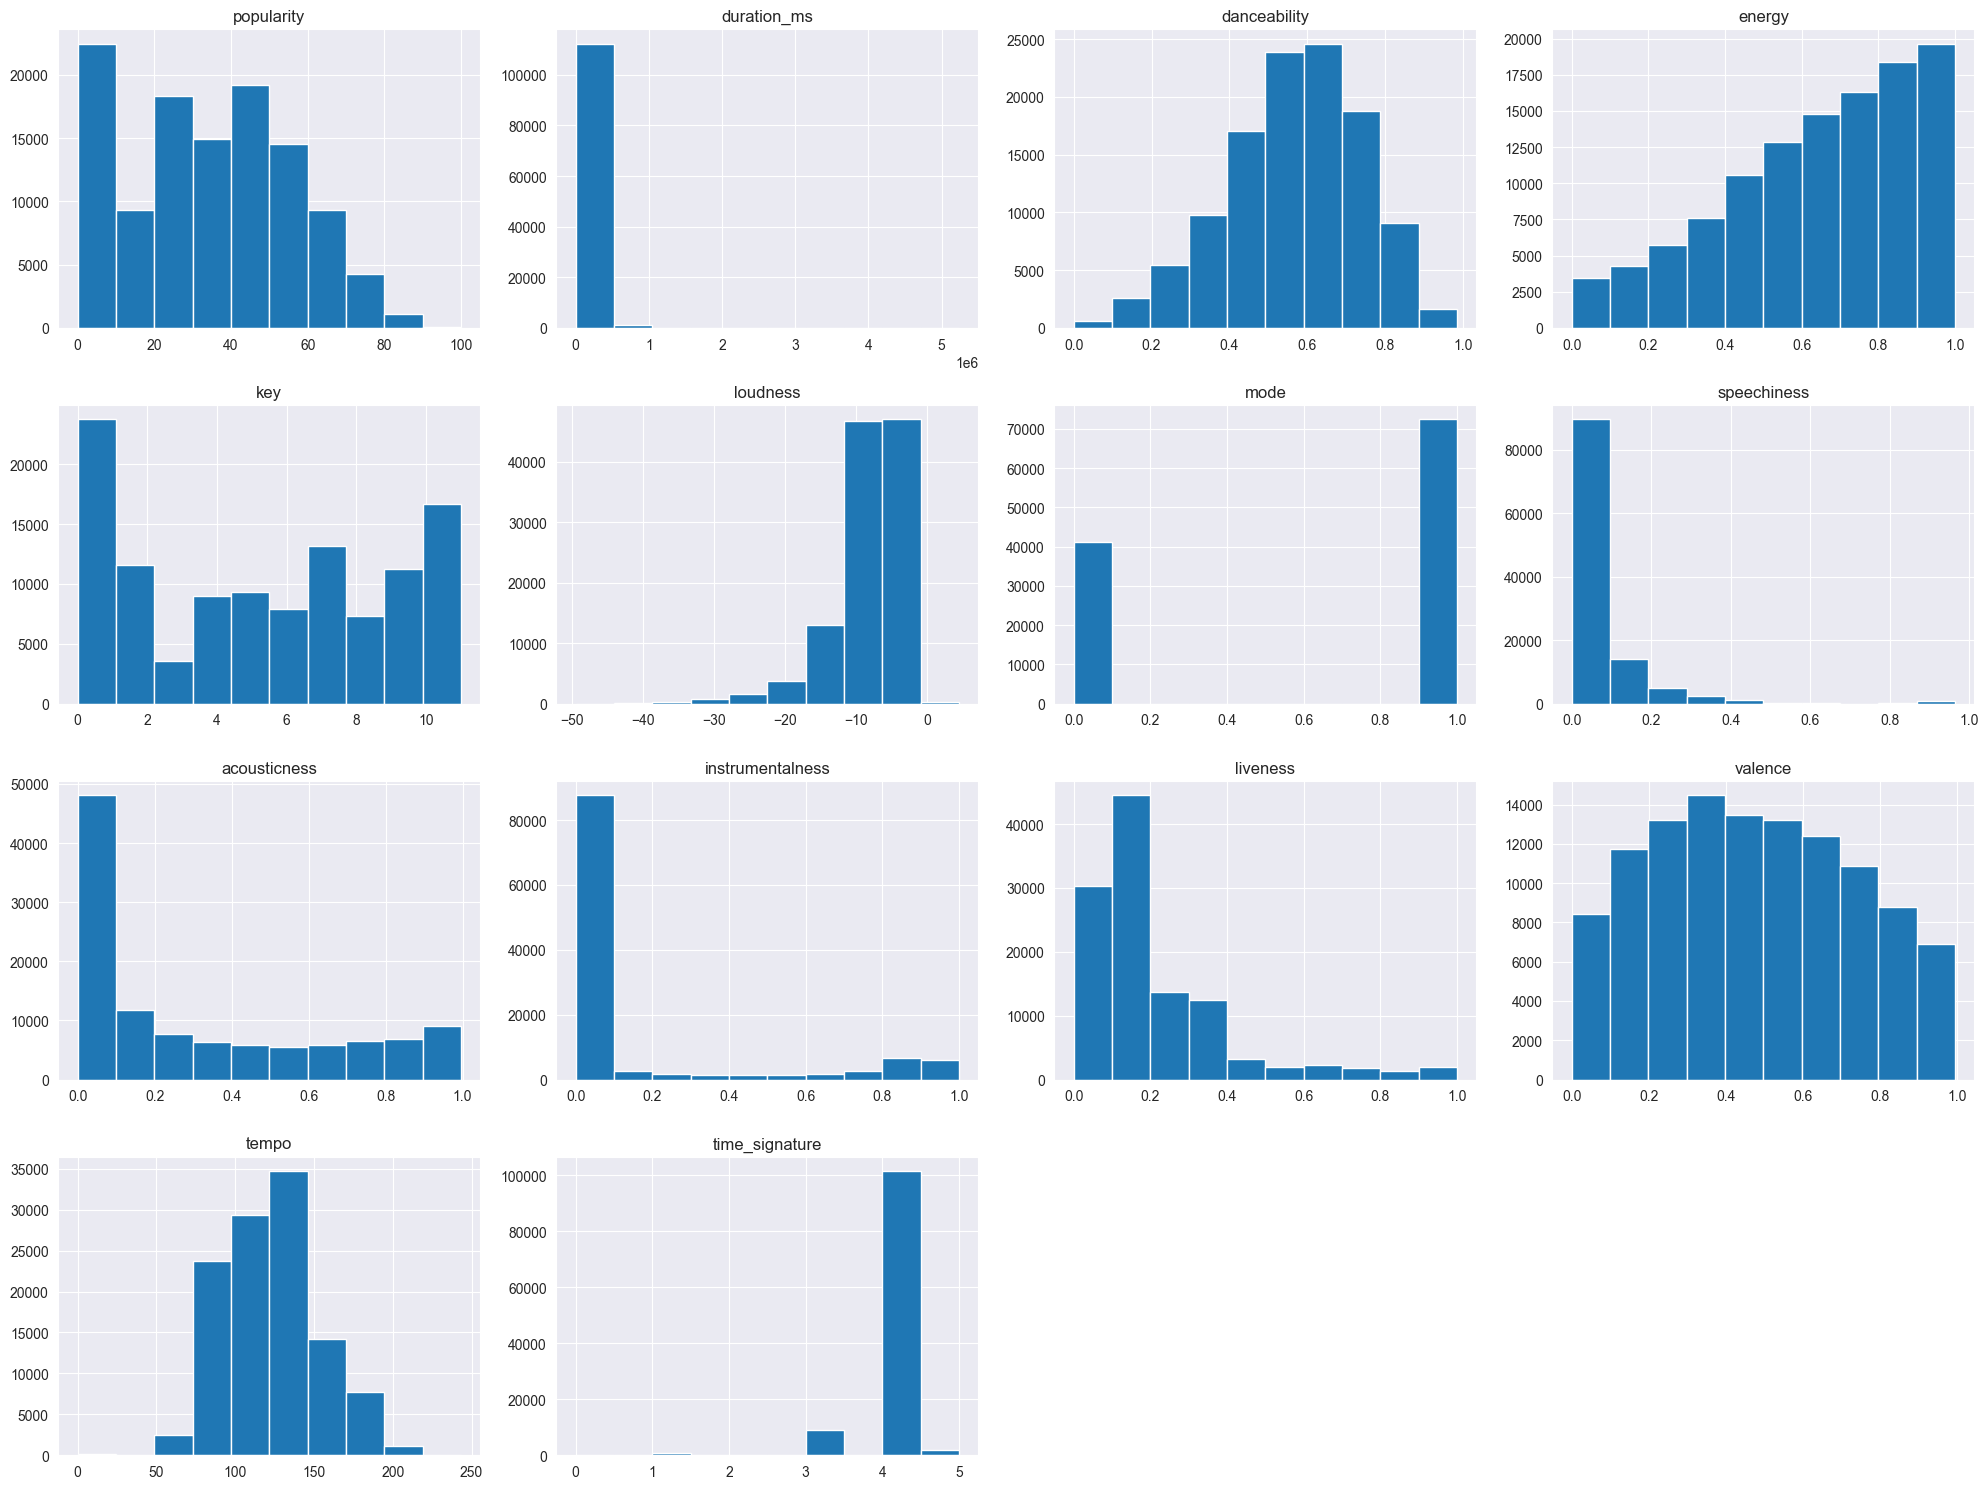

In [104]:
sns.set_style('darkgrid')
numerical_cols.hist(figsize=(20,15))
plt.tight_layout()
plt.show()

In [105]:
numerical_cols.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113550.000000,1.135500e+05,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000
mean,33.324139,2.280794e+05,0.567031,0.642090,5.309467,-8.243419,0.637860,0.084674,0.314067,0.155702,0.213611,0.474207,122.175888,3.904218
std,22.283976,1.064148e+05,0.173408,0.251052,3.560134,5.011401,0.480621,0.105761,0.331907,0.309216,0.190461,0.259204,29.972861,0.432115
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.741802e+05,0.456000,0.473000,2.000000,-9.997750,0.000000,0.035900,0.016800,0.000000,0.098000,0.260000,99.296500,4.000000
50%,35.000000,2.130000e+05,0.580000,0.685000,5.000000,-6.997000,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.020000,4.000000
75%,50.000000,2.615878e+05,0.695000,0.854000,8.000000,-5.001000,1.000000,0.084500,0.596000,0.048675,0.273000,0.683000,140.073750,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


To enhance our understanding of the data distribution, we'll visualize histograms for each column.

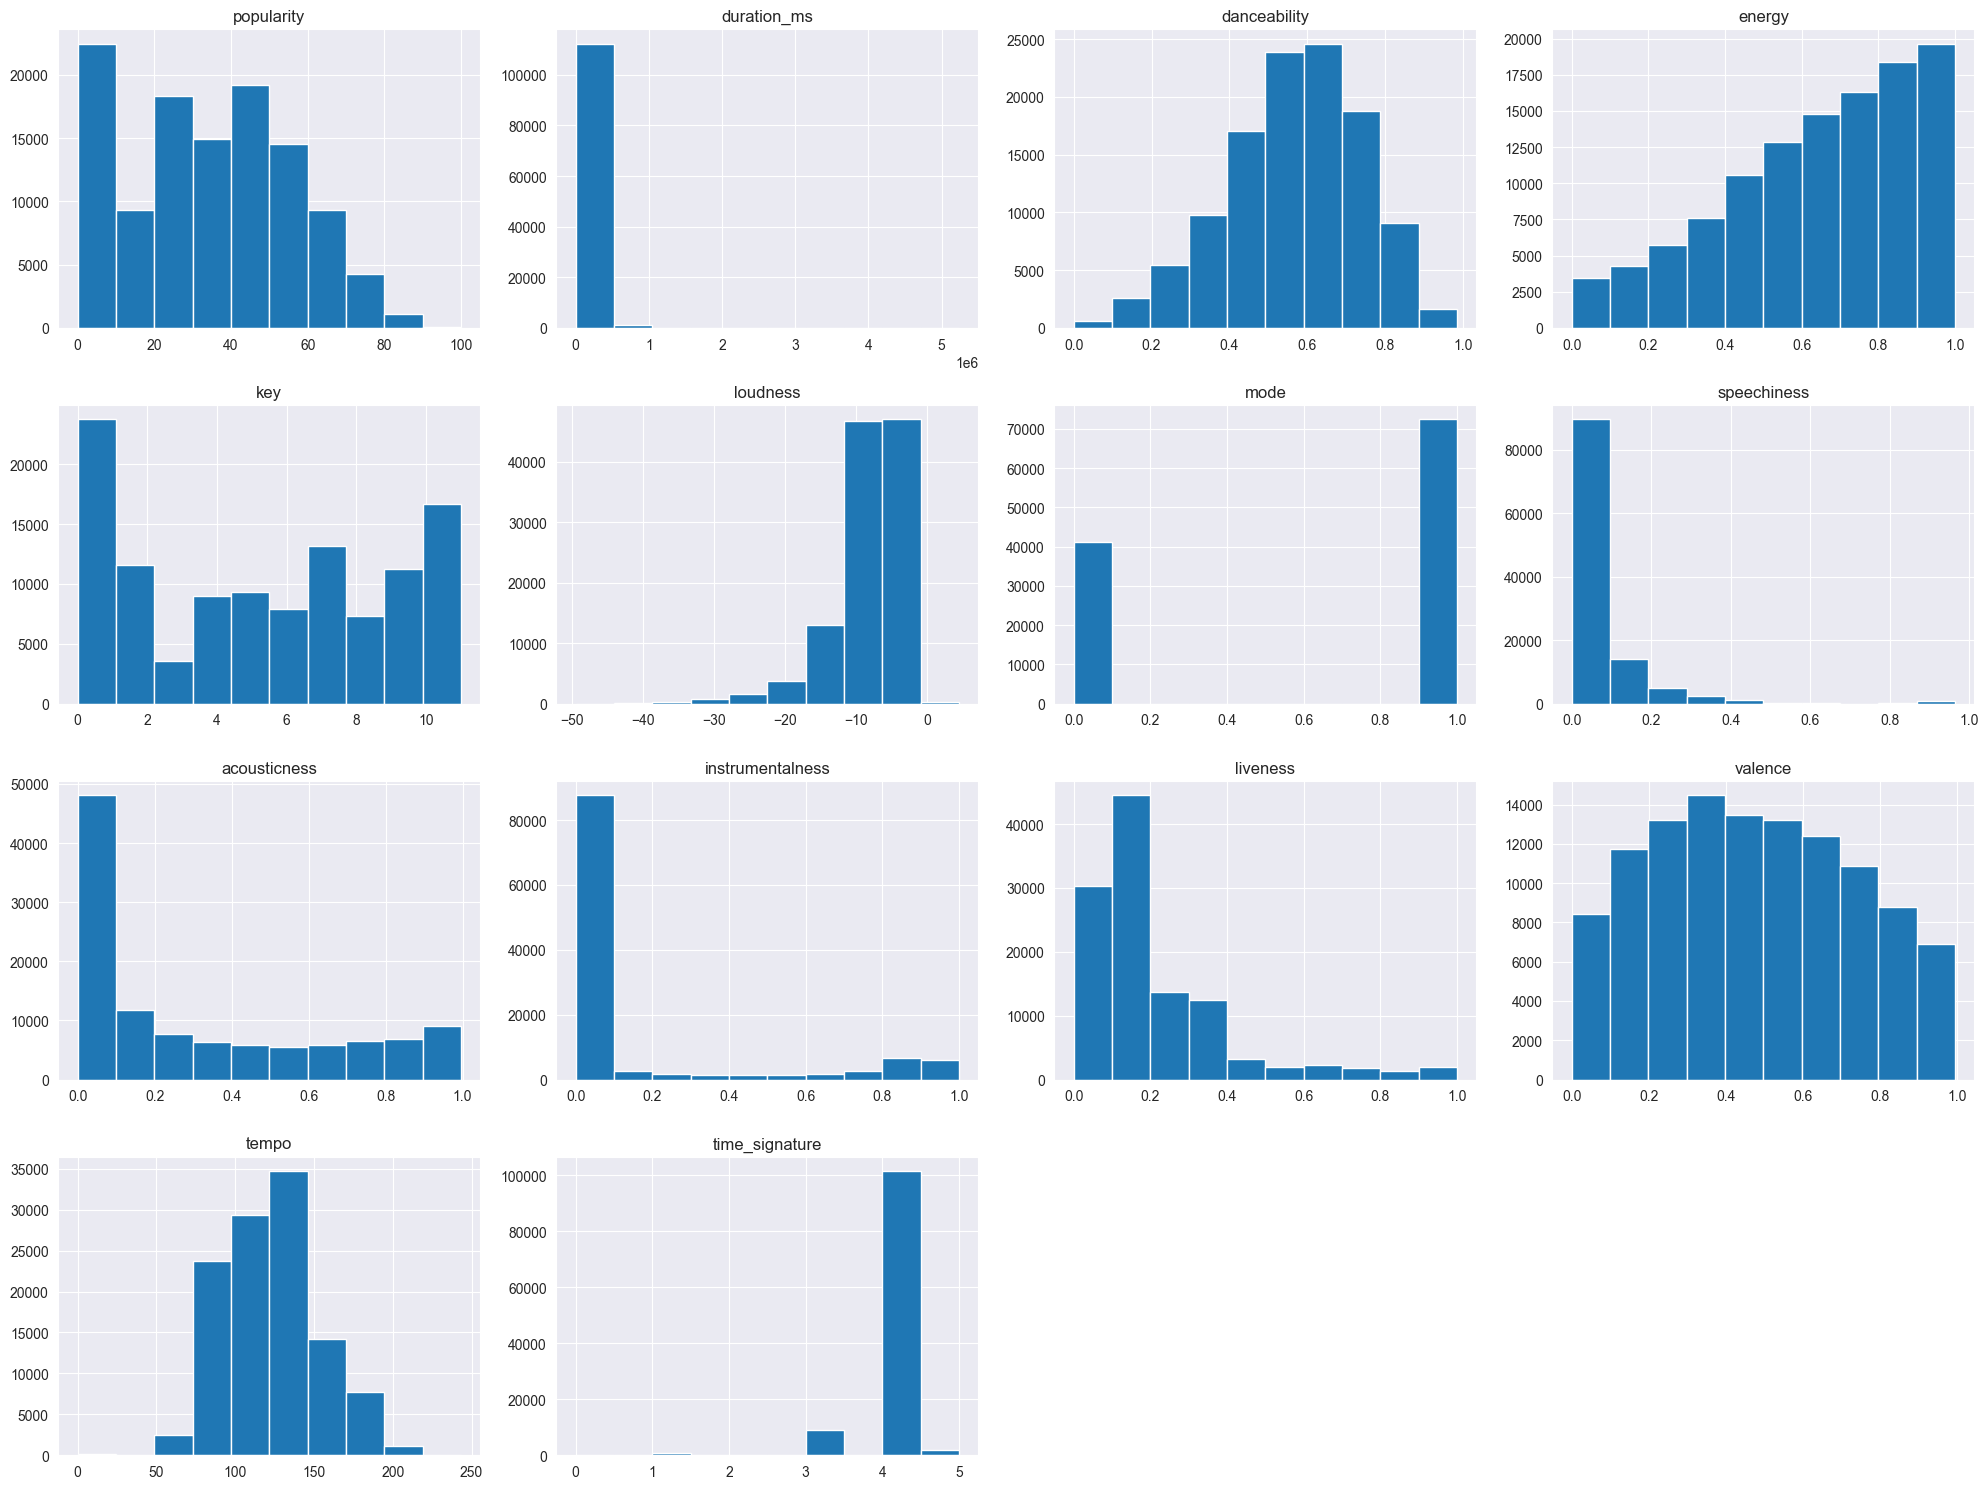

In [13]:
sns.set_style('darkgrid')
numerical_cols.hist(figsize=(20,15))
plt.tight_layout()
plt.show()

### 02.1.2 Distribution of a categorical column

- 5 samples of categorical columns

In [106]:
categorical_cols = df[df.columns[(df.dtypes == 'object') | (df.dtypes == 'bool')]]
categorical_cols.sample(5)

,track_id,artists,album_name,track_name,explicit,track_genre
63453,1GSPV6AYG8NrtpgqhWx893,SCANDAL,Queens are trumps -切り札はクイーン-,HARUKAZE,False,j-rock
32995,2CNYxrbpznawrX4k3FGy6X,Milk & Sugar,Selection ADE 2022,Stay Around - Earth n Days Remix,False,electronic
65110,5pZEThCuY84PiajfmeOJ3i,Jack Harlow,Back to School!,First Class,True,k-pop
49589,3jgviNSXrwAlolj9IACVJH,DJ Isaac,Oldschool Hardcore,Bad Dreams,False,hardstyle
72223,2NDH7pMWv3UQHOCN4tnXbI,Dayseeker,Sleeptalk,Sleeptalk,False,metalcore


- The categorical columns consist of 5 object columns and 1 boolean column.
- All are non-null.

In [107]:
categorical_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113550 entries, 0 to 113999
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   track_id     113550 non-null  object
 1   artists      113550 non-null  object
 2   album_name   113550 non-null  object
 3   track_name   113550 non-null  object
 4   explicit     113550 non-null  bool  
 5   track_genre  113550 non-null  object
dtypes: bool(1), object(5)
memory usage: 5.3+ MB


- Missing values = 1

In [17]:
(categorical_cols == 'nan').sum()


track_id       0
artists        1
album_name     1
track_name     1
explicit       0
track_genre    0
dtype: int64

In [18]:
categorical_cols[categorical_cols['track_name'] == 'nan']

,track_id,artists,album_name,track_name,explicit,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,nan,nan,nan,False,k-pop


**These are concise statistics about the columns**
- `count`: the number of values in each column
- `unique`: the number of unique values
- `top`: the most frequently occurring value
- `freq`: the frequency

In [19]:
df.describe(include=['object', 'bool'])

,track_id,artists,album_name,track_name,explicit,track_genre
count,113550,113550,113550,113550,113550,113550
unique,89741,31438,46590,73609,2,114
top,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,False,acoustic
freq,9,279,195,151,103832,1000


**Observation:**
- Some tracks have multiple entries, as the count is higher than the unique 
- "The Beatles" is the top artist with a relatively high frequency.
- The top album is "Alternative Christmas 2022" with a frequency of 195.
- "Run Rudolph Run" is the most frequently occurring track.
- The majority of tracks (103,832) are not explicit (lyrics).
- "Acoustic" is the most frequent track genre.

### Now, let's examine how categorical column charts are distributed.

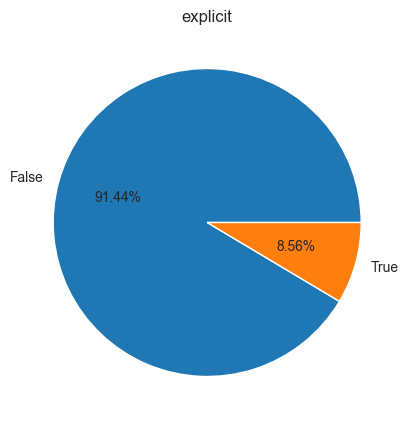

In [23]:
plt.figure(figsize=(5, 5))
plt.title('explicit')
plt.pie(np.unique(categorical_cols['explicit'], return_counts=True)[1], labels=np.unique(categorical_cols['explicit'], return_counts=True)[0], autopct = '%1.2f%%');


- Similar to the pie chart, we can observe that the majority of tracks do not have explicit lyrics. (**over 90%**)

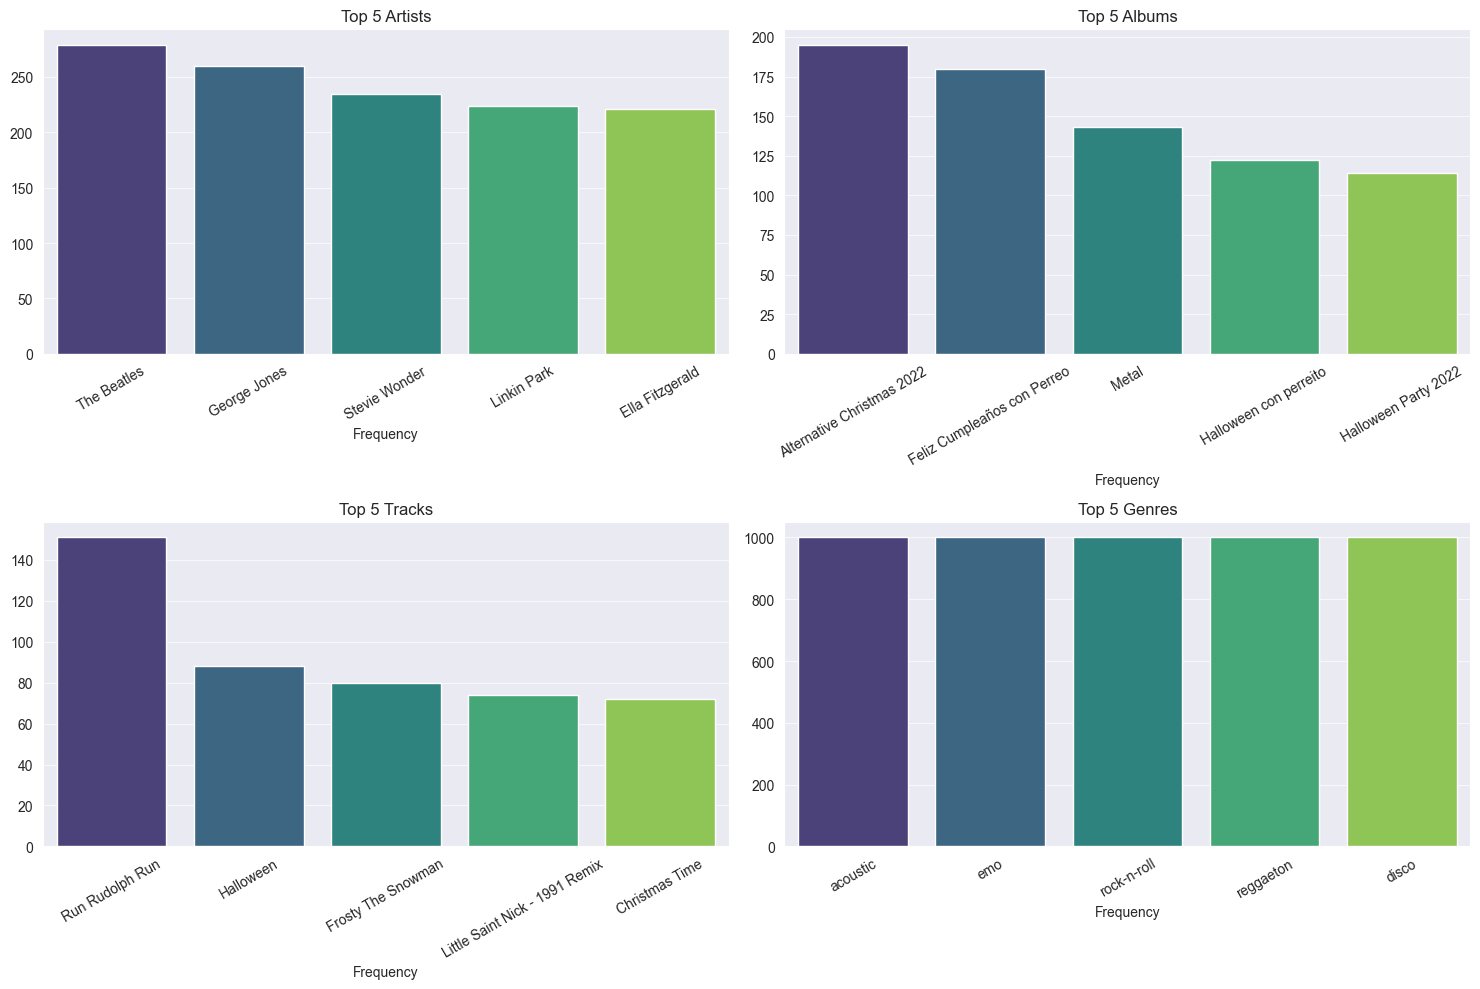

In [26]:
top_n = 5
sns.set_style('darkgrid')

# Get the top N most frequent artists, albums, tracks, and genres
top_artists = df['artists'].value_counts().head(top_n)
top_albums = df['album_name'].value_counts().head(top_n)
top_tracks = df['track_name'].value_counts().head(top_n)
top_genres = df['track_genre'].value_counts().head(top_n)

# Disable FutureWarning
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

    # Plotting
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

    # Top N Artists
    sns.barplot(x=top_artists.index, y=top_artists.values, palette="viridis", ax=axes[0, 0], width=0.8,zorder=3)
    axes[0, 0].set_title(f'Top {top_n} Artists')
    axes[0, 0].set_xlabel('Frequency')
    axes[0, 0].tick_params(axis='x', rotation=30)
    axes[0, 0].yaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    # Top N Albums
    sns.barplot(x=top_albums.index, y=top_albums.values, palette="viridis", ax=axes[0, 1], width=0.8,zorder=3)
    axes[0, 1].set_title(f'Top {top_n} Albums')
    axes[0, 1].set_xlabel('Frequency')
    axes[0, 1].tick_params(axis='x', rotation=30)
    axes[0, 1].yaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    # Top N Tracks
    sns.barplot(x=top_tracks.index, y=top_tracks.values, palette="viridis", ax=axes[1, 0], width=0.8,zorder=3)
    axes[1, 0].set_title(f'Top {top_n} Tracks')
    axes[1, 0].set_xlabel('Frequency')
    axes[1, 0].tick_params(axis='x', rotation=30)
    axes[1, 0].yaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    # Top N Genres
    sns.barplot(x=top_genres.index, y=top_genres.values, palette="viridis", ax=axes[1, 1], width=0.8,zorder=3)
    axes[1, 1].set_title(f'Top {top_n} Genres')
    axes[1, 1].set_xlabel('Frequency')
    axes[1, 1].tick_params(axis='x', rotation=30)
    axes[1, 1].yaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    plt.tight_layout()
    plt.show()

- Here is the chart for the top 5 artists, albums, track names, and genres.